In [2]:
# You will need to install the `matplotlib` python package\n", 
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.style.use('ggplot')
# This defines an aesthetic style

In [3]:
# This is a common dataset about Iris flowers
df = pd.read_csv('./IRIS.csv', header=0, index_col=None)
df = df.copy()
df



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,7.2,3.0,5.8,1.6,virginica
96,7.4,2.8,6.1,1.9,virginica
97,7.9,3.8,6.4,2.0,virginica
98,6.4,2.8,5.6,2.2,virginica


Add a column to the dataframe about that is an integer-represented version of the `species` column. For example where species == 'setosa', the new column should be 0, and where species == 'virginica' the new colum should would be 1



In [38]:
## create a column with 0 1 2 for species
df['species'] = df['species'].astype('category')

df['species_int'] = df['species']

# df = df.replace({'setosa': 0})
species_int_dict = {'setosa': 0, 'virginica': 1, 'versicolor': 2}
species_int_dict_rev = {0: 'setosa', 1: 'virginica', 2: 'versicolor'}
df = df.replace({'species_int': species_int_dict})
df


,sepal_length,sepal_width,petal_length,petal_width,species,species_int
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
95,7.2,3.0,5.8,1.6,virginica,1
96,7.4,2.8,6.1,1.9,virginica,1
97,7.9,3.8,6.4,2.0,virginica,1
98,6.4,2.8,5.6,2.2,virginica,1


Create a scatter plot with Sepal Length, Sepal Width on the spatial dimensions and colored points for the species

You may want to create a integer-type column for species
If you use the integer species column (which has values 0 - 2) you can index this array of color names:   
`mycolors = ['red','blue','green']`

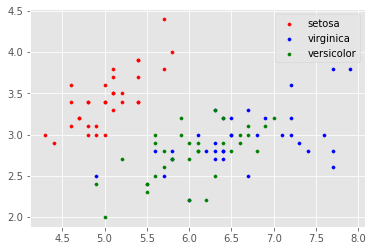

In [39]:
species = sorted(list(set(df['species'])))
species_int = sorted(list(set(df['species_int'])))
colors = {
   'setosa': 5,
   'virginica': 2,
   'versicolor': 3
}
my_colors = ['red','blue','green']

plt.figure()
for spec in species_int:
   data = df.loc[df['species_int'] == spec]
   plt.scatter(data['sepal_length'],
               data['sepal_width'],
               label = species_int_dict_rev[spec],
               s = 10,
               c = my_colors[spec]
               )
plt.legend()
plt.show()


But there are a lot more than two dimensions (+ species) in the data

Let's try a 3D plot with matplotlib

See [https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)

Create a 3D scatter plot of the sepal width , sepal length and petal length
You can pass a color vector like you (hopefully) did with 2D scatter()

You also may want to render the same plot from different angles.

In [27]:
from mpl_toolkits.mplot3d import Axes3D

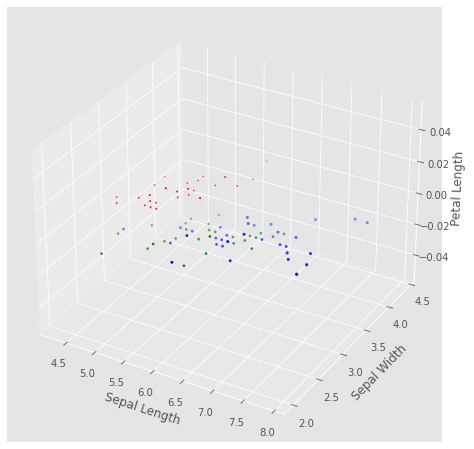

In [44]:

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
for spec in species_int:
   data = df.loc[df['species_int'] == spec]
   plt.scatter(data['sepal_length'], data['sepal_width'], data['petal_length'],
                  label = species_int_dict_rev[spec],
                  # s =10,
                  c = my_colors[spec]
               )

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.show()

 Use the Seaborn package (https://seaborn.pydata.org/) 
 to visualize joint distributions between sepal and petal properties

 Specifically, use the `jointplot()` function to visualize petal properties  
 Note that this function may take a few seconds to run.

 Question: adding the argument `kind='reg'` adds information to the plot looking at the documentation, what is this information?
 


In [45]:
import seaborn as sns

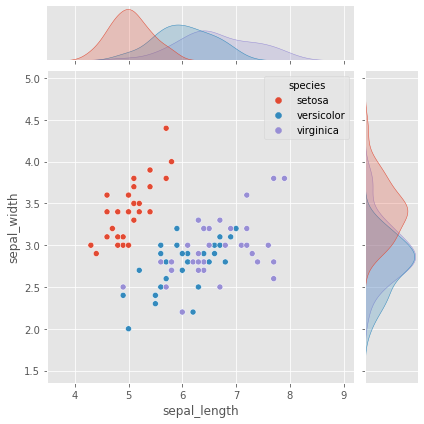

In [54]:
sns.jointplot(data=df, x='sepal_length', y='sepal_width', hue='species')


Use seaborn's `pairplot()` function to plot All The Dimensions at once  
You may want to use the original dataframe (without the integer species column) without the added columns

Try adding `kind='reg',diag_kind='kde'` to pairplot()

Which representation do you like better? why?

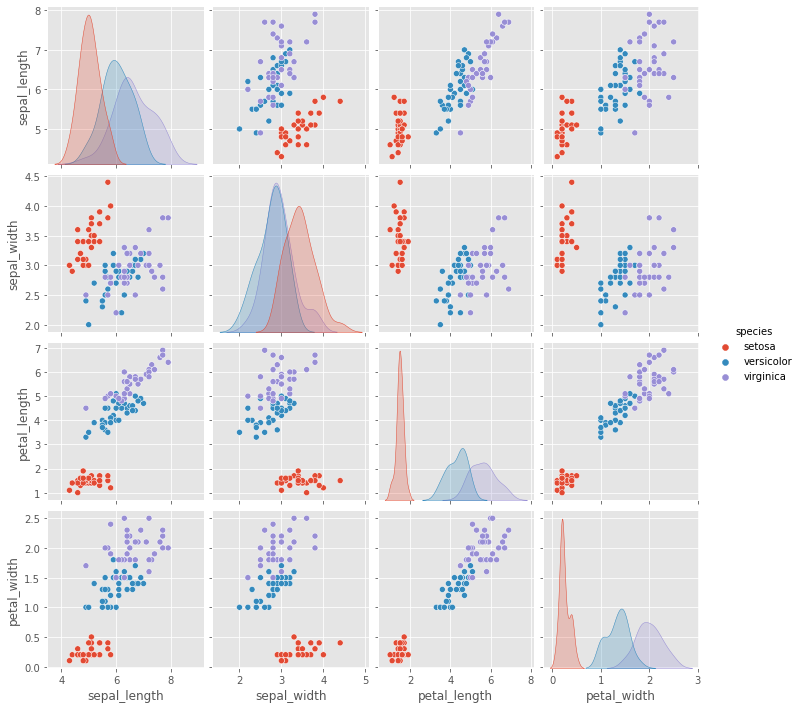

In [61]:
df_no_int = df.copy()
df_no_int = df_no_int.drop(['species_int'], axis=1)
sns.pairplot(df_no_int, hue='species')

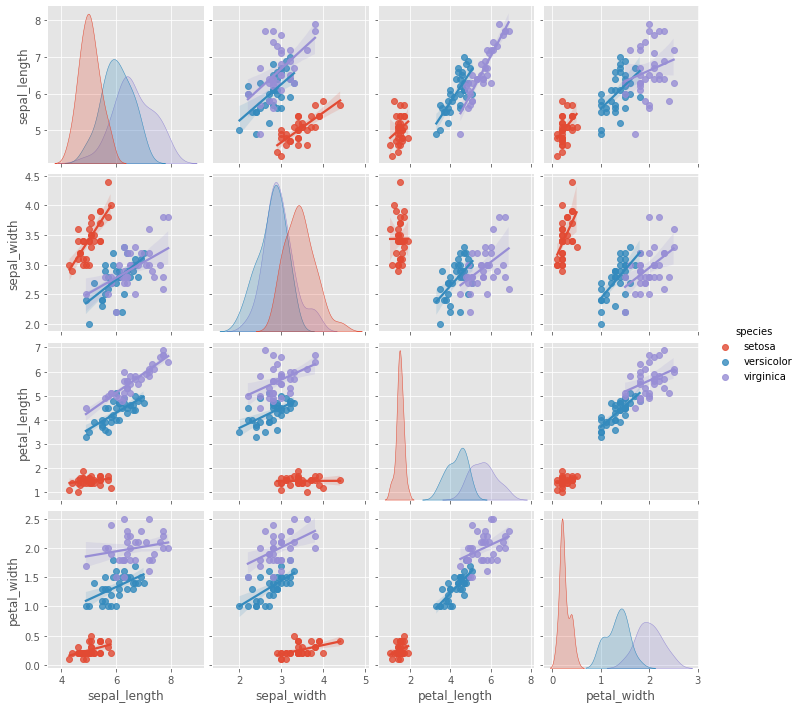

In [62]:
sns.pairplot(df_no_int, hue='species', kind='reg')

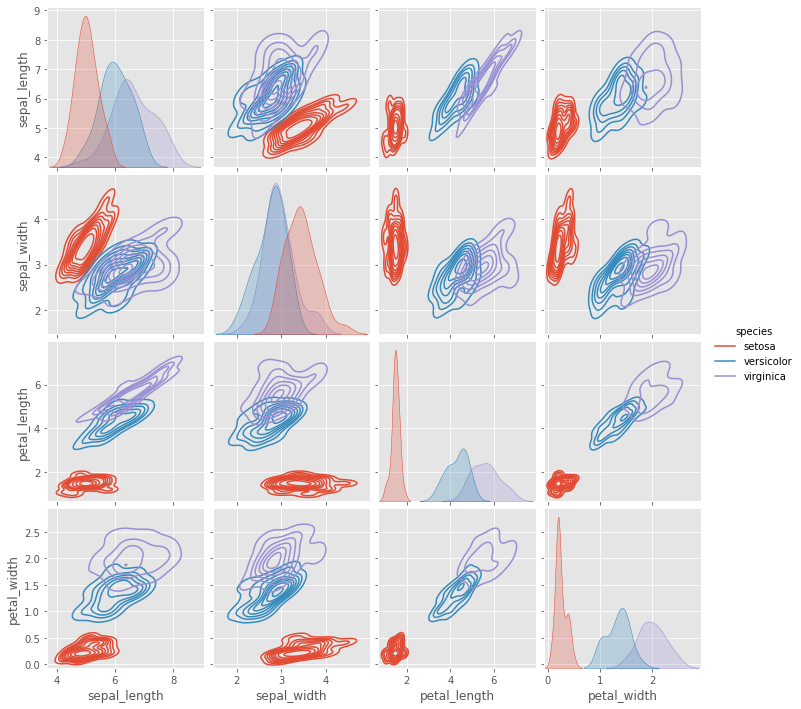

In [63]:
sns.pairplot(df_no_int, hue='species', kind='kde')

KDE easier to see whats going on, the line added by the 'reg' kind just gets lost in the graph overall, easier to see overlapping densities